# 🧼  <span style="color:#f6f794"> Data Analysis </span>
___

#### 📚 <span style="color:#f6f794"> Importing libraries and setting displays </span>

In [17]:
import pandas as pd
import numpy as np
import os
import re
import numpy as np
from sklearn.impute import KNNImputer
from sklearn.linear_model import LinearRegression
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from scipy.stats import ks_2samp



import matplotlib.pyplot as plt 
import matplotlib.colors as mcolors
import seaborn as sns

from fpdf import FPDF
from matplotlib.backends.backend_pdf import PdfPages

In [18]:
pd.set_option('display.max_rows', 100) 
pd.set_option('display.max_columns', None) 

# pd.set_option('display.max_columns', None)  # Show all columns
# pd.set_option('display.max_rows', None)     # Show all rows
# pd.set_option('display.max_colwidth', None) # Show entire content of each column
pd.set_option('display.width', None)        # No limit on display width
pd.set_option('display.expand_frame_repr', False)  # Prevent wrapping

#### 📂 <span style="color:#f6f794"> Opening files and convert the dates columns to datetime.</span>

In [19]:
df_clean = pd.read_csv("clean_data_states_daily.csv")

In [20]:
df_clean.dtypes

date                            object
state                           object
state_name                      object
positive                       float64
probable_cases                 float64
negative                       float64
total_test_results             float64
hospitalized_currently         float64
hospitalized_cumulative        float64
in_icu_currently               float64
in_icu_cumulative              float64
recovered                      float64
last_update_et                  object
death                          float64
death_confirmed                float64
death_probable                 float64
positive_increase                int64
total_test_results_increase      int64
death_increase                   int64
hospitalized_increase            int64
dtype: object

In [21]:
def convert_object_to_date(df):
   
    for column in df.columns:
        if df[column].dtype == 'object':  # Check if column is of type 'object'
            try:
                # Try to convert to datetime. Pandas will try to infer the correct format.
                df[column] = pd.to_datetime(df[column], errors='raise')
                print(f"Successfully converted column '{column}' to datetime.")
            except Exception as e:
                print(f"Error converting column '{column}': {e}. This column was not converted.")
    
    return df

# Call function
df_clean = convert_object_to_date(df_clean)

Successfully converted column 'date' to datetime.
Error converting column 'state': Unknown datetime string format, unable to parse: AK, at position 0. This column was not converted.
Error converting column 'state_name': Unknown datetime string format, unable to parse: Alaska, at position 0. This column was not converted.
Successfully converted column 'last_update_et' to datetime.


C:\Users\yaelp\AppData\Local\Temp\ipykernel_19096\1237848952.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='raise')
C:\Users\yaelp\AppData\Local\Temp\ipykernel_19096\1237848952.py:7: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df[column] = pd.to_datetime(df[column], errors='raise')


In [23]:
df_clean.sample(5)

,date,state,state_name,positive,probable_cases,negative,total_test_results,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,recovered,last_update_et,death,death_confirmed,death_probable,positive_increase,total_test_results_increase,death_increase,hospitalized_increase
15430,2020-06-05,NC,North Carolina,33255.0,NaN,NaN,460788.0,717.0,NaN,NaN,NaN,NaN,2020-06-05 12:15:00,966.0,966.0,NaN,1289,18746,6,0
4481,2020-12-17,AL,Alabama,310335.0,56971.0,1499349.0,1752713.0,2425.0,29559.0,NaN,2383.0,183625.0,2020-12-17 11:00:00,4254.0,3745.0,509.0,4695,11585,56,0
7578,2020-10-23,KS,Kansas,76230.0,NaN,540032.0,616262.0,403.0,3584.0,2.0,1001.0,NaN,2020-10-23 10:00:00,975.0,NaN,NaN,1774,10753,23,78
14900,2020-06-14,AZ,Arizona,35691.0,317.0,302354.0,469793.0,1457.0,4148.0,452.0,NaN,NaN,2020-06-14 00:00:00,1186.0,1119.0,67.0,1233,9317,3,33
18084,2020-04-19,WA,Washington,12361.0,NaN,NaN,165059.0,586.0,NaN,193.0,NaN,NaN,2020-04-19 00:00:00,615.0,NaN,NaN,347,1967,17,0


___
####   <span style="color:#f6f794"> Dictionary: </span>

| Field Name                     | Description |
|---------------------------------|-------------|
| `date`                         | Date of data collection (YYYYMMDD format) |
| `state`                        | 2-letter state/territory abbreviation |
| `state_name`                   | Complete name of the state |
| `positive`                     | Confirmed + probable COVID-19 cases |
| `probable_cases`               | Probable cases (not lab-confirmed) |
| `negative`                     | Negative PCR test results (people) |
| `total_test_results`           | Total test results (PCR, estimated) |
| `hospitalized_currently`       | Current COVID-19 hospitalizations |
| `hospitalized_cumulative`      | Total ever hospitalized with COVID-19 |
| `in_icu_currently`             | Current ICU patients with COVID-19 |
| `in_icu_cumulative`            | Total ever in ICU with COVID-19 |
| `recovered`                    | Total recovered COVID-19 cases |
| `last_update_et`               | Last update time (Eastern Time) |
| `death`                        | Total COVID-19 deaths (confirmed + probable) |
| `death_confirmed`              | Confirmed COVID-19 deaths (lab-tested) |
| `death_probable`               | Probable COVID-19 deaths (not lab-tested) |
| `positive_increase`            | Daily increase in positive cases |
| `total_test_results_increase`  | Daily increase in total test results |
| `death_increase`               | Daily increase in deaths |
| `hospitalized_increase`        | Daily increase in hospitalizations |
| `population`                   | Total population of the state |
| `land_area_square_miles`       | Land area of the state in square miles |
| `population_density`           | Population density (people per square mile) |
| `death_rate_per_population`    | Death rate per population (deaths per 100,000 people) |


__
####  <span style="color:#f6f794"> Making a new df with density information from the US states from 2020 obtained in internet </span>

https://state.1keydata.com/state-population-density.php

In [24]:
# Create the DataFrame
df_states_info = pd.DataFrame({
    'state_name_web': [
        'Alabama', 'Alaska', 'Arizona', 'Arkansas', 'California', 
        'Colorado', 'Connecticut', 'Delaware', 'Florida', 'Georgia',
        'Hawaii', 'Idaho', 'Illinois', 'Indiana', 'Iowa', 
        'Kansas', 'Kentucky', 'Louisiana', 'Maine', 'Maryland',
        'Massachusetts', 'Michigan', 'Minnesota', 'Mississippi', 'Missouri', 
        'Montana', 'Nebraska', 'Nevada', 'New Hampshire', 'New Jersey',
        'New Mexico', 'New York', 'North Carolina', 'North Dakota', 'Ohio',
        'Oklahoma', 'Oregon', 'Pennsylvania', 'Rhode Island', 'South Carolina',
        'South Dakota', 'Tennessee', 'Texas', 'Utah', 'Vermont',
        'Virginia', 'Washington', 'West Virginia', 'Wisconsin', 'Wyoming'
    ],
    'population': [
        5024279, 733391, 7151502, 3011524, 39538223,
        5773714, 3605944, 989948, 21538187, 10711908,
        1455271, 1839106, 12812508, 6785528, 3190369,
        2937880, 4505836, 4657757, 1362359, 6177224,
        7029917, 10077331, 5706494, 2961279, 6154913,
        1084225, 1961504, 3104614, 1377529, 9288994,
        2117522, 20201249, 10439388, 779094, 11799448,
        3959353, 4237256, 13002700, 1097379, 5118425,
        886667, 6910840, 29145505, 3271616, 643077,
        8631393, 7705281, 1793716, 5893718, 576851
    ],
    'land_area_square_miles': [
        50744, 571951, 113635, 52068, 155959,
        103718, 4845, 1954, 53927, 57906,
        6423, 82747, 55584, 35867, 55869,
        81815, 39728, 43562, 30862, 9774,
        7840, 56804, 79610, 46907, 68886,
        145552, 76872, 109826, 8968, 7417,
        121356, 47214, 48711, 68976, 40948,
        68667, 95997, 44817, 1045, 30110,
        75885, 41217, 261797, 82144, 9250,
        39594, 66544, 24078, 54310, 97100
    ],
    'population_density': [
        99.0, 1.3, 62.9, 57.8, 253.5,
        55.7, 744.3, 506.6, 399.4, 185.0,
        226.6, 22.2, 230.5, 189.2, 57.1,
        35.9, 113.4, 106.9, 44.1, 632.0,
        896.7, 177.4, 71.7, 63.1, 89.3,
        7.4, 25.5, 28.3, 153.6, 1252.4,
        17.4, 427.9, 214.3, 11.3, 288.2,
        57.7, 44.1, 290.1, 1050.1, 170.0,
        11.7, 167.7, 111.3, 39.8, 69.5,
        218.0, 115.8, 74.5, 108.5, 5.9
    ]
})

# Add state abbreviations (for merging with COVID data later)
state_abbreviations = {
    'Alabama': 'AL', 'Alaska': 'AK', 'Arizona': 'AZ', 'Arkansas': 'AR',
    'California': 'CA', 'Colorado': 'CO', 'Connecticut': 'CT', 'Delaware': 'DE',
    'Florida': 'FL', 'Georgia': 'GA', 'Hawaii': 'HI', 'Idaho': 'ID',
    'Illinois': 'IL', 'Indiana': 'IN', 'Iowa': 'IA', 'Kansas': 'KS',
    'Kentucky': 'KY', 'Louisiana': 'LA', 'Maine': 'ME', 'Maryland': 'MD',
    'Massachusetts': 'MA', 'Michigan': 'MI', 'Minnesota': 'MN', 'Mississippi': 'MS',
    'Missouri': 'MO', 'Montana': 'MT', 'Nebraska': 'NE', 'Nevada': 'NV',
    'New Hampshire': 'NH', 'New Jersey': 'NJ', 'New Mexico': 'NM', 'New York': 'NY',
    'North Carolina': 'NC', 'North Dakota': 'ND', 'Ohio': 'OH', 'Oklahoma': 'OK',
    'Oregon': 'OR', 'Pennsylvania': 'PA', 'Rhode Island': 'RI', 'South Carolina': 'SC',
    'South Dakota': 'SD', 'Tennessee': 'TN', 'Texas': 'TX', 'Utah': 'UT',
    'Vermont': 'VT', 'Virginia': 'VA', 'Washington': 'WA', 'West Virginia': 'WV',
    'Wisconsin': 'WI', 'Wyoming': 'WY'
}

df_states_info['state_abbreviation'] = df_states_info['state_name_web'].map(state_abbreviations)

# Reorder columns
df_states_info = df_states_info[['state_name_web', 'state_abbreviation', 'population', 'land_area_square_miles', 'population_density']]

df_states_info.to_csv('us_states_population_data.csv', index=False)

# Display the first 5 rows
print(df_states_info.head())

  state_name_web state_abbreviation  population  land_area_square_miles  population_density
0        Alabama                 AL     5024279                   50744                99.0
1         Alaska                 AK      733391                  571951                 1.3
2        Arizona                 AZ     7151502                  113635                62.9
3       Arkansas                 AR     3011524                   52068                57.8
4     California                 CA    39538223                  155959               253.5


___
#### 📊 <span style="color:#f6f794"> Unifying dataframes </span>

In [25]:
# Unifying or merging the dataframes with the states abbreviations
df_unified = pd.merge(
    df_clean, 
    df_states_info, 
    left_on='state', 
    right_on='state_abbreviation',
    how='left'  # Keeps all COVID data even if state info is missing
)

# Verify the merge worked
print("\nMerged columns:", df_unified.columns.tolist())

# Clean up duplicate columns (if any)
df_unified = df_unified.drop(columns=['state_abbreviation', 'state_name_web'])  # Remove duplicate abbreviation column

# Verify the merge
print(f"Original COVID rows: {len(df_clean)}")
print(f"Unified DataFrame rows: {len(df_unified)}")
print("\nColumns in unified DataFrame:")
print(df_unified.columns.tolist())



Merged columns: ['date', 'state', 'state_name', 'positive', 'probable_cases', 'negative', 'total_test_results', 'hospitalized_currently', 'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative', 'recovered', 'last_update_et', 'death', 'death_confirmed', 'death_probable', 'positive_increase', 'total_test_results_increase', 'death_increase', 'hospitalized_increase', 'state_name_web', 'state_abbreviation', 'population', 'land_area_square_miles', 'population_density']
Original COVID rows: 20780
Unified DataFrame rows: 20780

Columns in unified DataFrame:
['date', 'state', 'state_name', 'positive', 'probable_cases', 'negative', 'total_test_results', 'hospitalized_currently', 'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative', 'recovered', 'last_update_et', 'death', 'death_confirmed', 'death_probable', 'positive_increase', 'total_test_results_increase', 'death_increase', 'hospitalized_increase', 'population', 'land_area_square_miles', 'population_density']


In [26]:
df_unified.sample(5)

,date,state,state_name,positive,probable_cases,negative,total_test_results,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,recovered,last_update_et,death,death_confirmed,death_probable,positive_increase,total_test_results_increase,death_increase,hospitalized_increase,population,land_area_square_miles,population_density
10002,2020-09-10,NJ,New Jersey,199331.0,3917.0,2918240.0,3117571.0,435.0,22888.0,62.0,NaN,NaN,2020-09-10 00:00:00,16008.0,14225.0,1783.0,490,22571,5,34,9288994.0,7417.0,1252.4
18630,2020-04-09,OH,Ohio,5512.0,NaN,NaN,55620.0,NaN,1612.0,NaN,497.0,NaN,2020-04-09 14:00:00,213.0,NaN,NaN,364,3215,20,117,11799448.0,40948.0,288.2
16633,2020-05-14,AL,Alabama,10968.0,NaN,131017.0,136372.0,509.0,1350.0,NaN,489.0,NaN,2020-05-14 00:00:00,467.0,467.0,NaN,351,3154,18,33,5024279.0,50744.0,99.0
2951,2021-01-14,OK,Oklahoma,344506.0,NaN,2563861.0,2908367.0,1844.0,19460.0,474.0,NaN,303476.000000,NaT,2882.0,NaN,NaN,3142,18977,34,261,3959353.0,68667.0,57.7
19079,2020-04-01,OK,Oklahoma,719.0,NaN,1248.0,1967.0,174.0,219.0,98.0,NaN,120150.195846,2020-04-01 08:00:00,30.0,NaN,NaN,154,173,7,42,3959353.0,68667.0,57.7


___
## 📊 <span style="color:#f6f794"> Analysis </span>

In [27]:
df_unified.columns

Index(['date', 'state', 'state_name', 'positive', 'probable_cases', 'negative',
       'total_test_results', 'hospitalized_currently',
       'hospitalized_cumulative', 'in_icu_currently', 'in_icu_cumulative',
       'recovered', 'last_update_et', 'death', 'death_confirmed',
       'death_probable', 'positive_increase', 'total_test_results_increase',
       'death_increase', 'hospitalized_increase', 'population',
       'land_area_square_miles', 'population_density'],
      dtype='object')

####  <span style="color:#f6f794"> Checking for nulls again </span>

In [28]:
# Checking nulls again
nulls = df_unified.isnull().sum()
nulls = nulls[nulls > 0]

if not nulls.empty:
    print(f"Nulls in 'df_unified'      ({len(df_unified)} rows)")
    print(pd.DataFrame({'Null Count': nulls, 'Null %': (nulls / len(df_unified) * 100).round(2)}))

Nulls in 'df_unified'      (20780 rows)
                         Null Count  Null %
state_name                      714    3.44
positive                         80    0.38
probable_cases                11434   55.02
negative                       7490   36.04
total_test_results              117    0.56
hospitalized_currently         3257   15.67
hospitalized_cumulative        8196   39.44
in_icu_currently               9144   44.00
in_icu_cumulative             16991   81.77
recovered                      8506   40.93
last_update_et                  616    2.96
death_confirmed               11200   53.90
death_probable                13161   63.33
population                     2153   10.36
land_area_square_miles         2153   10.36
population_density             2153   10.36


####  <span style="color:#f6f794"> Quick numbers made with `describe.()` method </span>

In [29]:
df_unified.describe()

,date,positive,probable_cases,negative,total_test_results,hospitalized_currently,hospitalized_cumulative,in_icu_currently,in_icu_cumulative,recovered,last_update_et,death,death_confirmed,death_probable,positive_increase,total_test_results_increase,death_increase,hospitalized_increase,population,land_area_square_miles,population_density
count,20780,2.070000e+04,9346.000000,1.329000e+04,2.066300e+04,17523.000000,12584.000000,11636.000000,3789.000000,1.227400e+04,20164,20780.000000,9580.000000,7619.000000,20780.000000,20780.000000,20780.000000,20780.000000,1.862700e+04,18627.000000,18627.000000
mean,2020-09-02 18:13:30.779595776,1.649197e+05,21583.632098,8.482246e+05,2.185866e+06,1187.488218,9212.221683,359.621176,1934.191607,9.383337e+04,2020-09-06 20:35:50.972029440,3576.919249,3732.702348,415.889356,1383.849519,17508.388210,24.790712,37.360780,6.660676e+06,70363.178290,209.039346
min,2020-01-13 00:00:00,0.000000e+00,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,0.000000,6.000000,2.000000e+00,2020-02-18 09:48:00,0.000000,0.000000,0.000000,-7757.000000,-130545.000000,-201.000000,-12257.000000,5.768510e+05,1045.000000,1.300000
25%,2020-06-02 00:00:00,5.777500e+03,792.250000,5.394125e+04,1.045555e+05,169.000000,988.000000,60.000000,501.000000,3.464500e+03,2020-06-09 00:00:00,183.000000,582.750000,77.000000,65.000000,1205.750000,0.000000,0.000000,1.839106e+06,35867.000000,44.100000
50%,2020-09-03 00:00:00,4.628450e+04,4412.000000,3.059720e+05,6.559820e+05,535.000000,4470.500000,172.000000,1295.000000,1.835700e+04,2020-09-06 14:55:00,1108.000000,2401.000000,215.000000,435.000000,6125.000000,6.000000,0.000000,4.657757e+06,53927.000000,108.500000
75%,2020-12-05 00:00:00,1.783155e+05,19326.250000,1.056611e+06,2.261068e+06,1275.000000,12119.000000,380.000000,2451.000000,9.423000e+04,2020-12-04 07:18:00,4159.000000,5383.250000,455.500000,1335.250000,19086.500000,24.000000,36.000000,7.705281e+06,81815.000000,226.600000
max,2021-03-07 00:00:00,3.501394e+06,365961.000000,1.018694e+07,4.964601e+07,22851.000000,82237.000000,5225.000000,9263.000000,2.502609e+06,2021-03-08 16:31:00,54124.000000,21177.000000,2594.000000,71734.000000,473076.000000,2559.000000,16373.000000,3.953822e+07,571951.000000,1252.400000
std,NaN,3.260890e+05,45319.301268,1.344501e+06,4.432206e+06,2050.516877,12542.767477,594.831150,1953.329983,2.089996e+05,NaN,6172.645333,4137.485919,537.243434,3023.558742,33586.022461,60.162742,208.237151,7.358977e+06,84665.852468,273.797931


####  <span style="color:#f6f794"> Showing the start and end date of the dataset </span>

In [30]:
# Convert again
df_clean['date'] = pd.to_datetime(df_clean['date'], format='%Y%m%d')  # Assuming YYYYMMDD format
df_clean['last_update_et'] = pd.to_datetime(df_clean['last_update_et'])

# Get date ranges
date_ranges = pd.DataFrame({
    'Column': ['date', 'last_update_et'],
    'Start Date': [df_clean['date'].min(), df_clean['last_update_et'].min()],
    'End Date': [df_clean['date'].max(), df_clean['last_update_et'].max()],
    'Days Covered': [(df_clean['date'].max() - df_clean['date'].min()).days,
                   (df_clean['last_update_et'].max() - df_clean['last_update_et'].min()).days]
})

# Add timezone info (if known)
date_ranges['Timezone'] = ['UTC?', 'ET'] 

print(f"Date Range Analysis:")
display(date_ranges)

# Check for days missing in date ranges
print("\nMissing dates in sequence:")
full_date_range = pd.date_range(start=df_clean['date'].min(), end=df_clean['date'].max())
missing_dates = full_date_range.difference(df_clean['date'])
print(missing_dates if not missing_dates.empty else "No dates missing in sequence")

Date Range Analysis:


,Column,Start Date,End Date,Days Covered,Timezone
0,date,2020-01-13 00:00:00,2021-03-07 00:00:00,419,UTC?
1,last_update_et,2020-02-18 09:48:00,2021-03-08 16:31:00,384,ET



Missing dates in sequence:
No dates missing in sequence


####  <span style="color:#f6f794"> Setting pallet colors </span>

In [31]:
# Set blue color palette
BLUE_PALETTE = ["#1f77b4", "#4e79a7", "#5c8fb3", "#7eb0d2", "#a5c8e0"]
sns.set_palette(BLUE_PALETTE)
sns.set_style("white")

####  <span style="color:#f6f794"> Making graphics to be saved in a pdf </span>

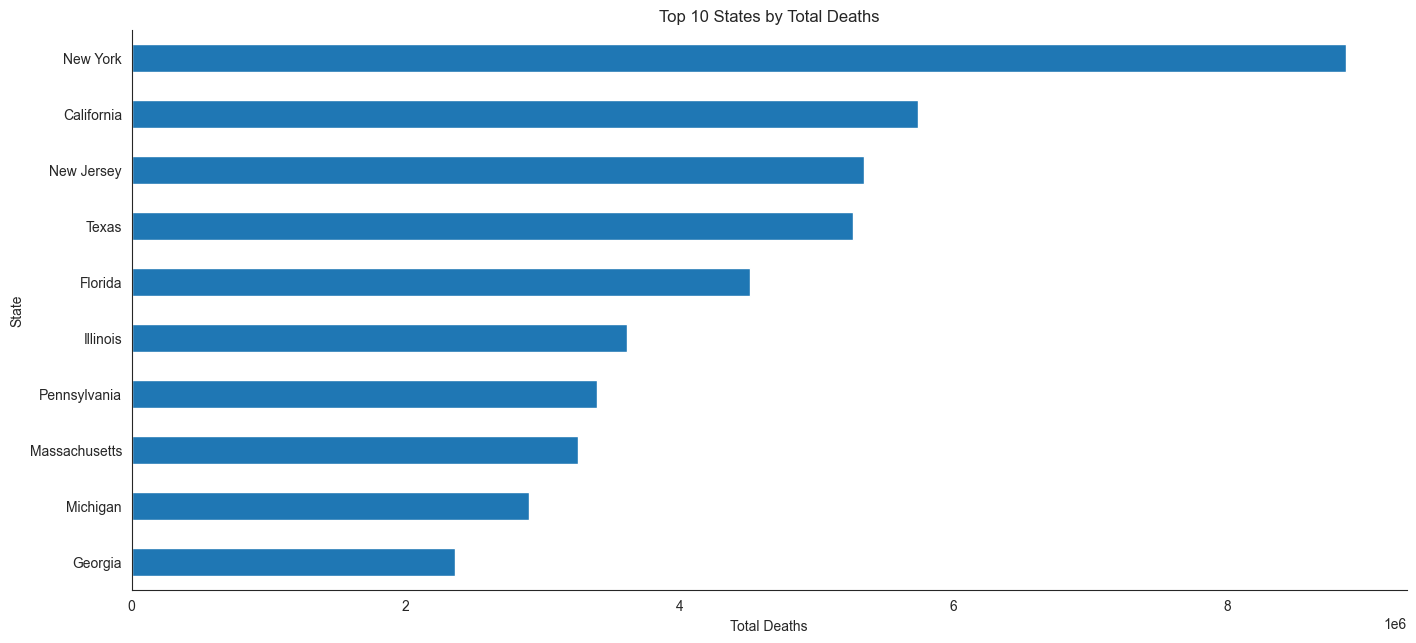

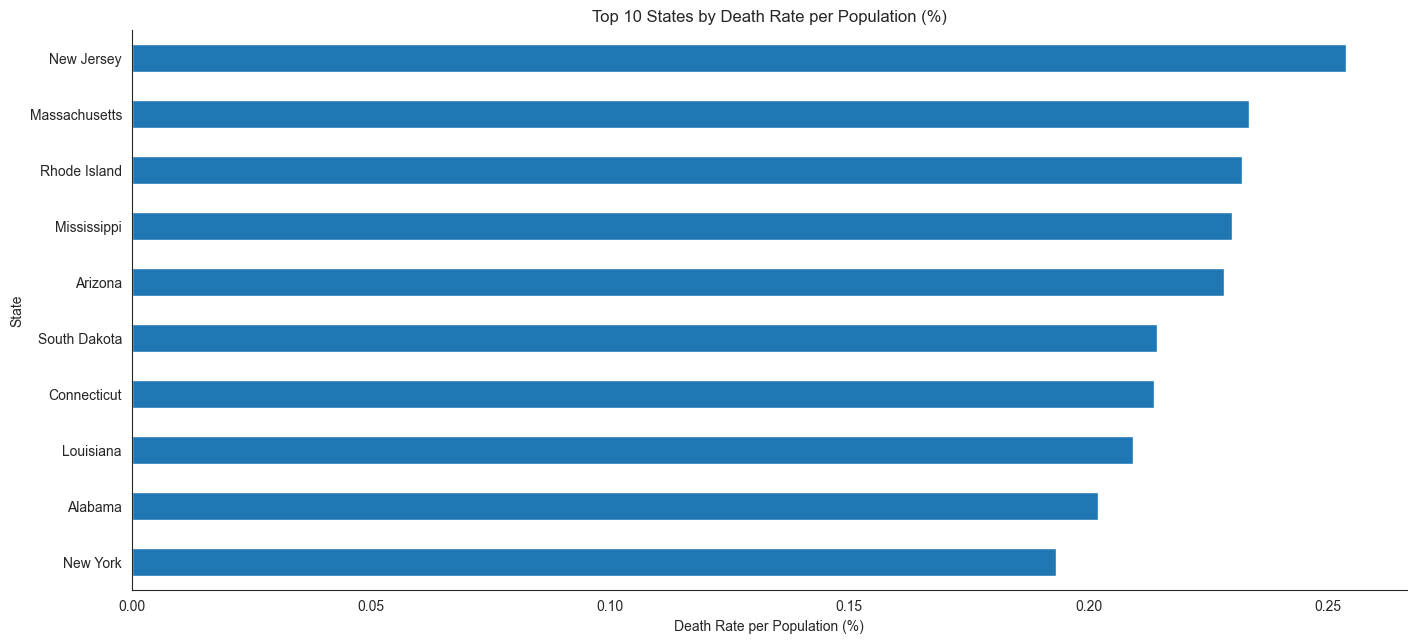

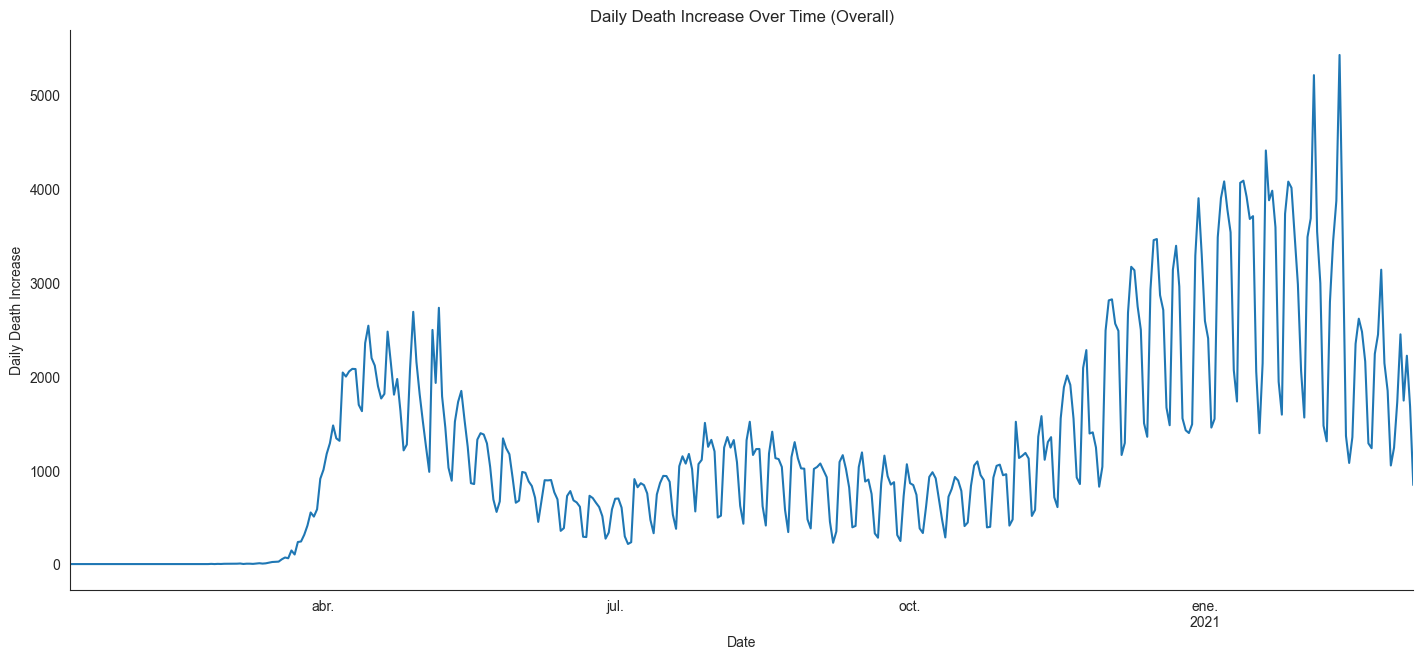

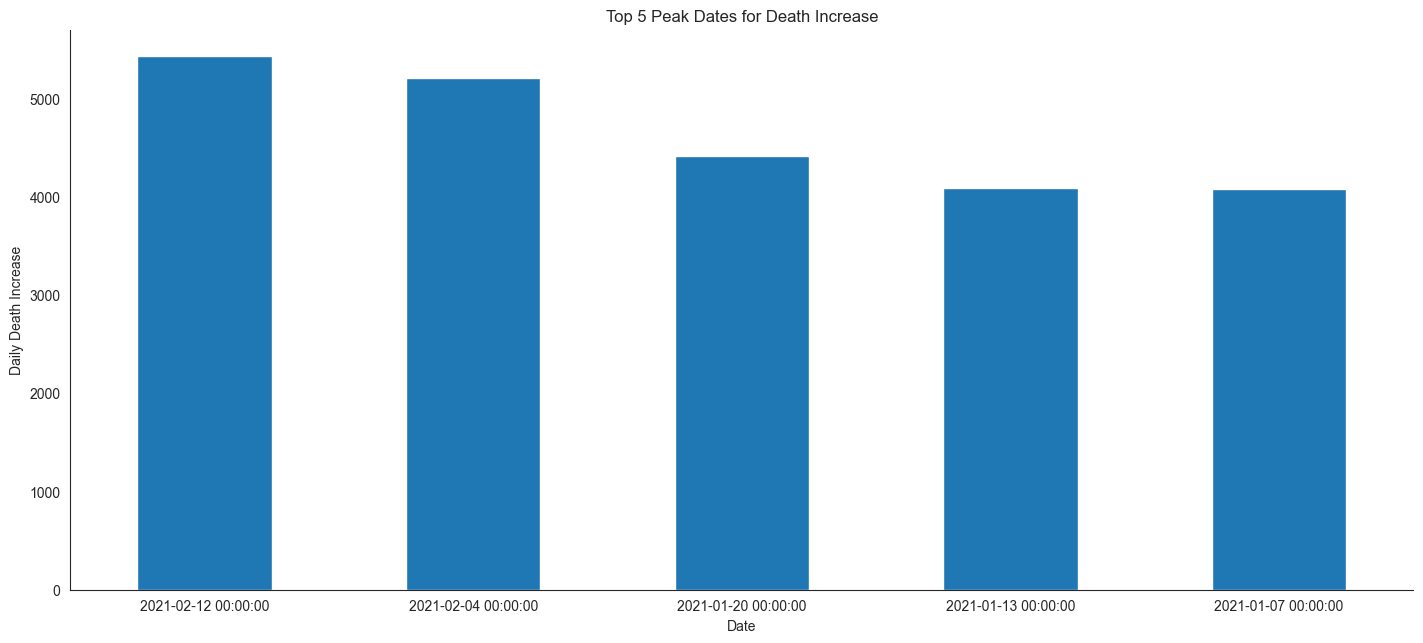

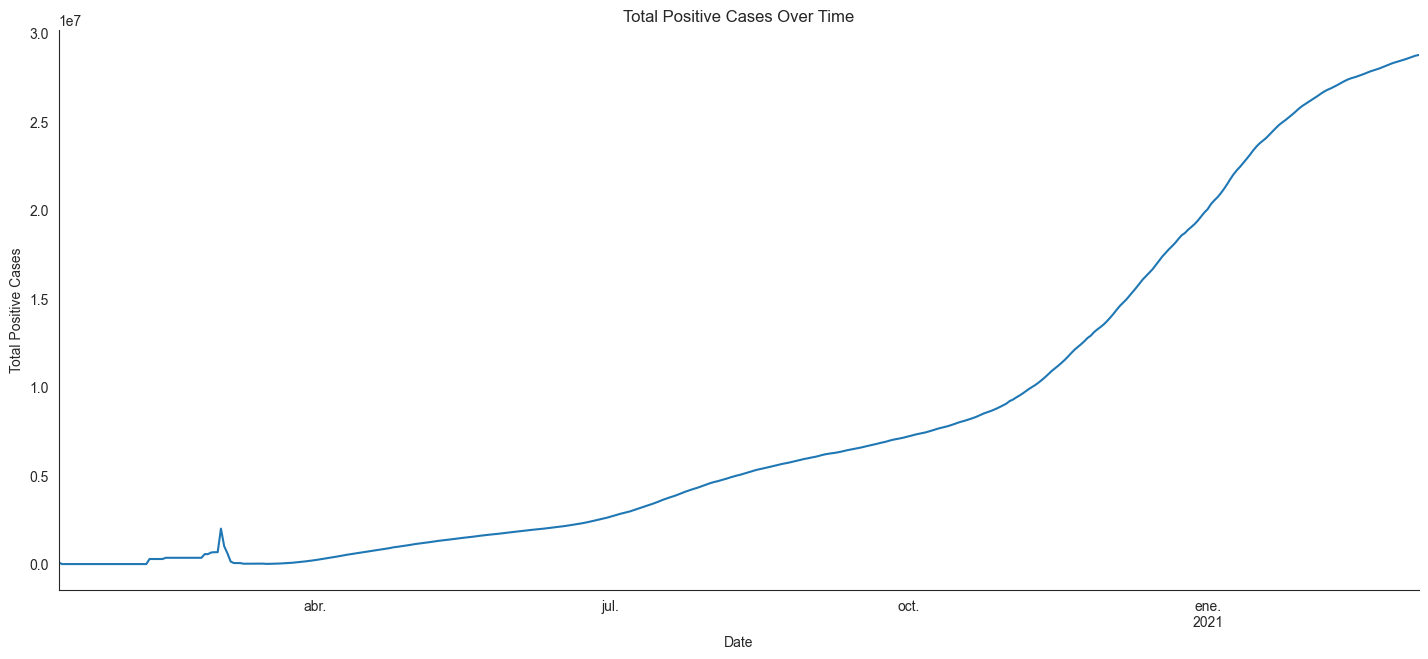

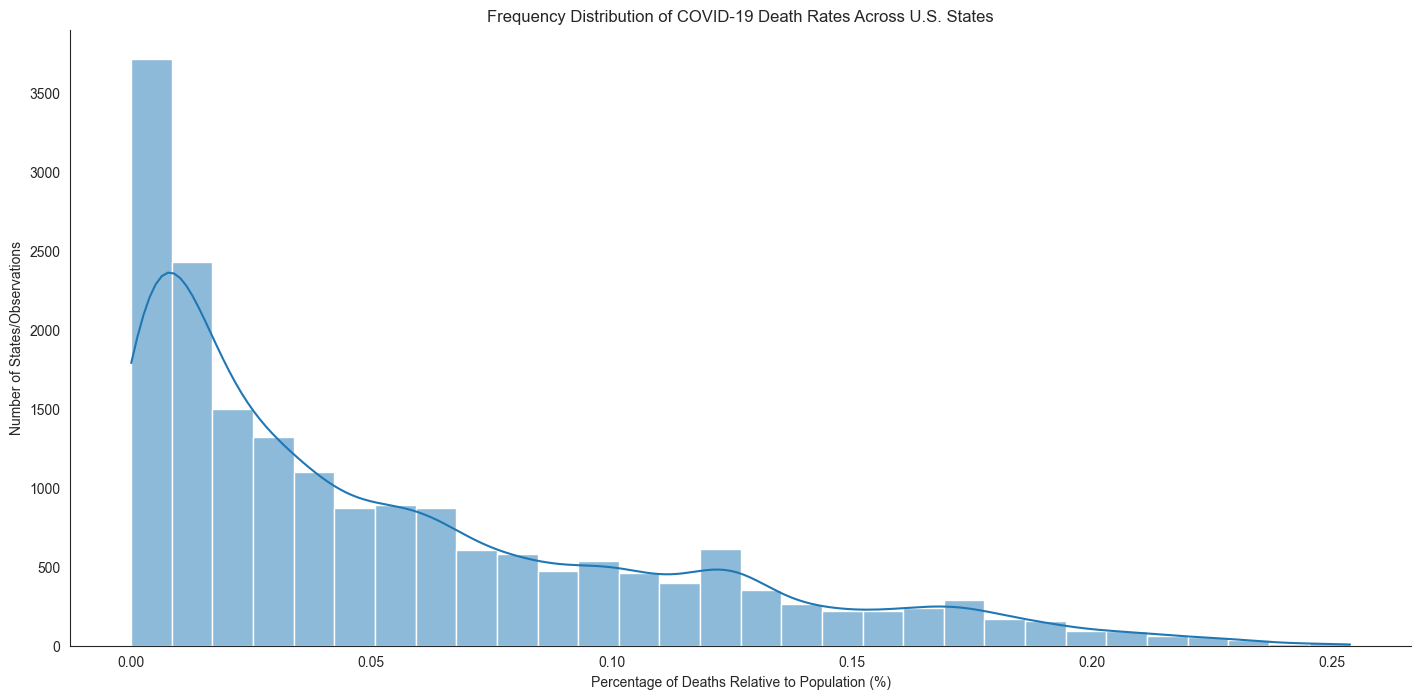

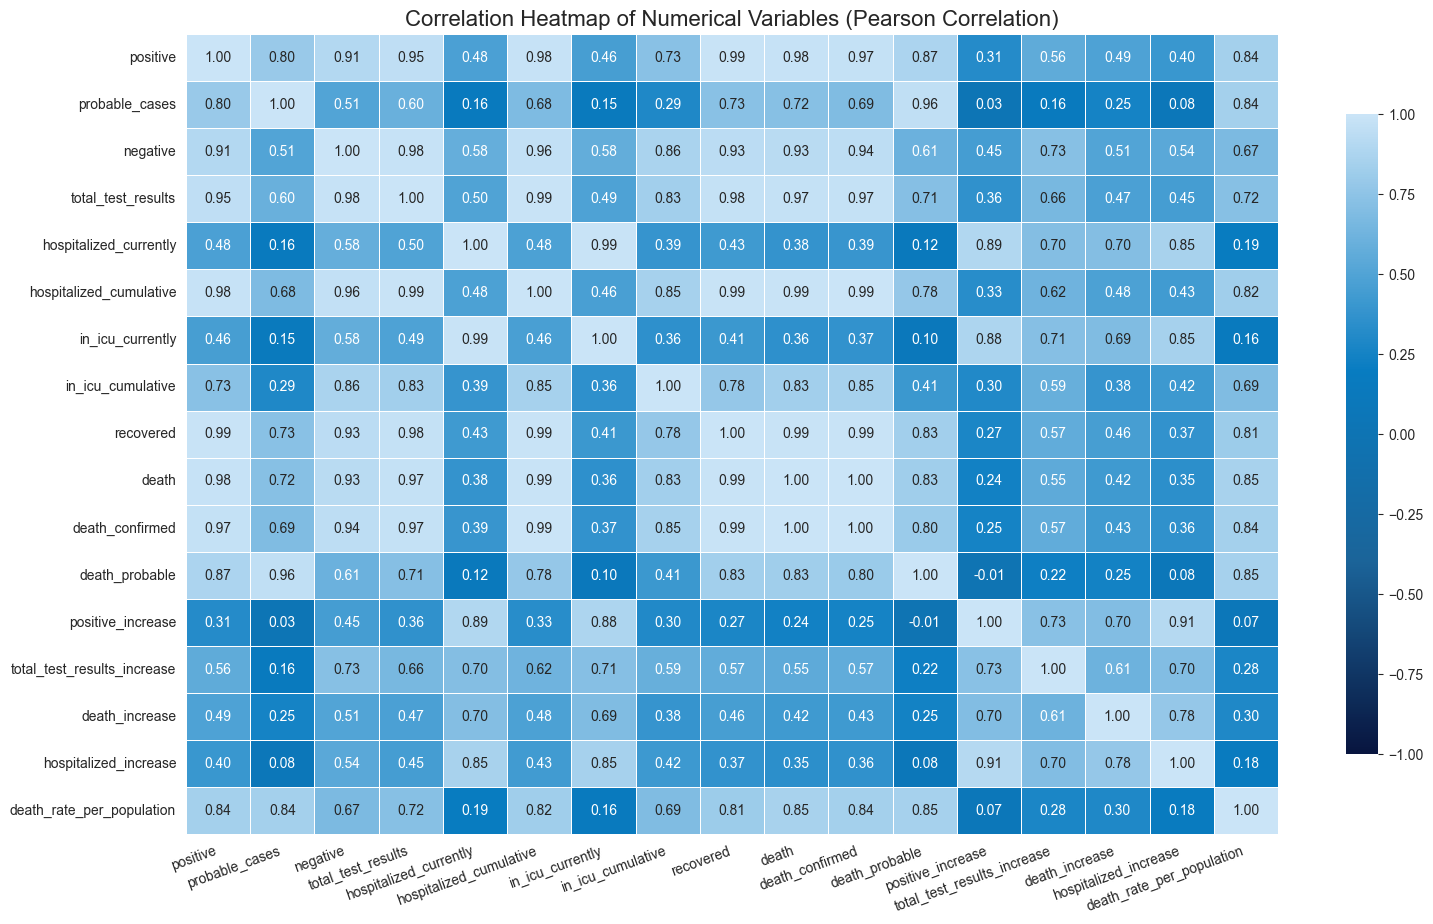

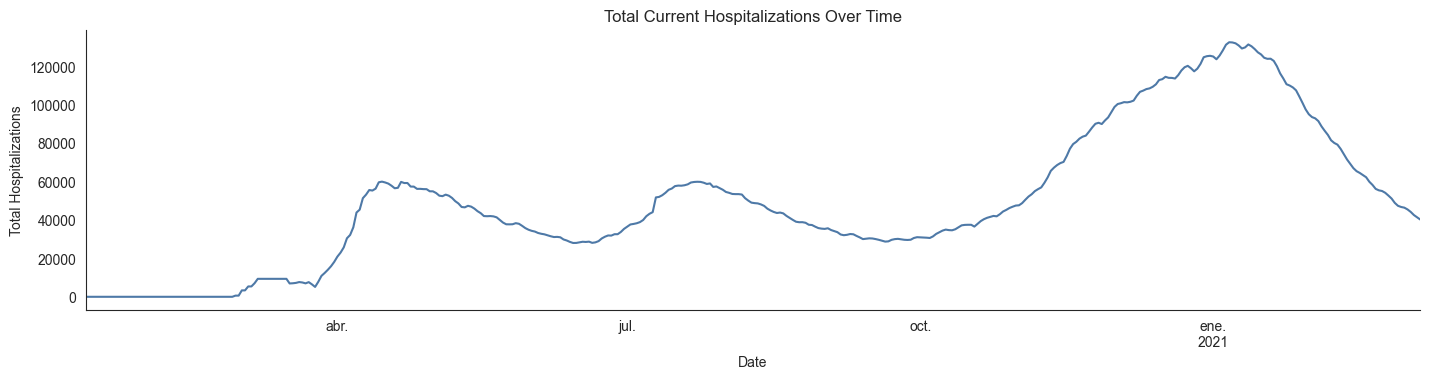

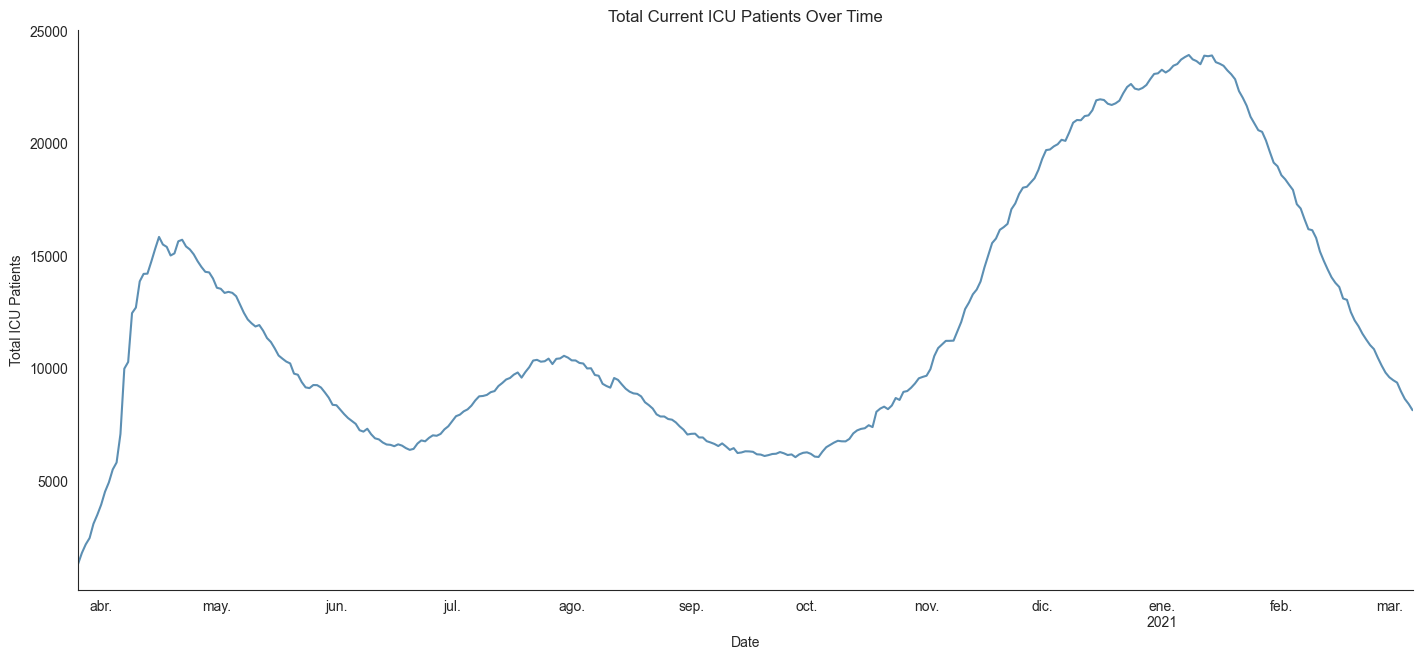

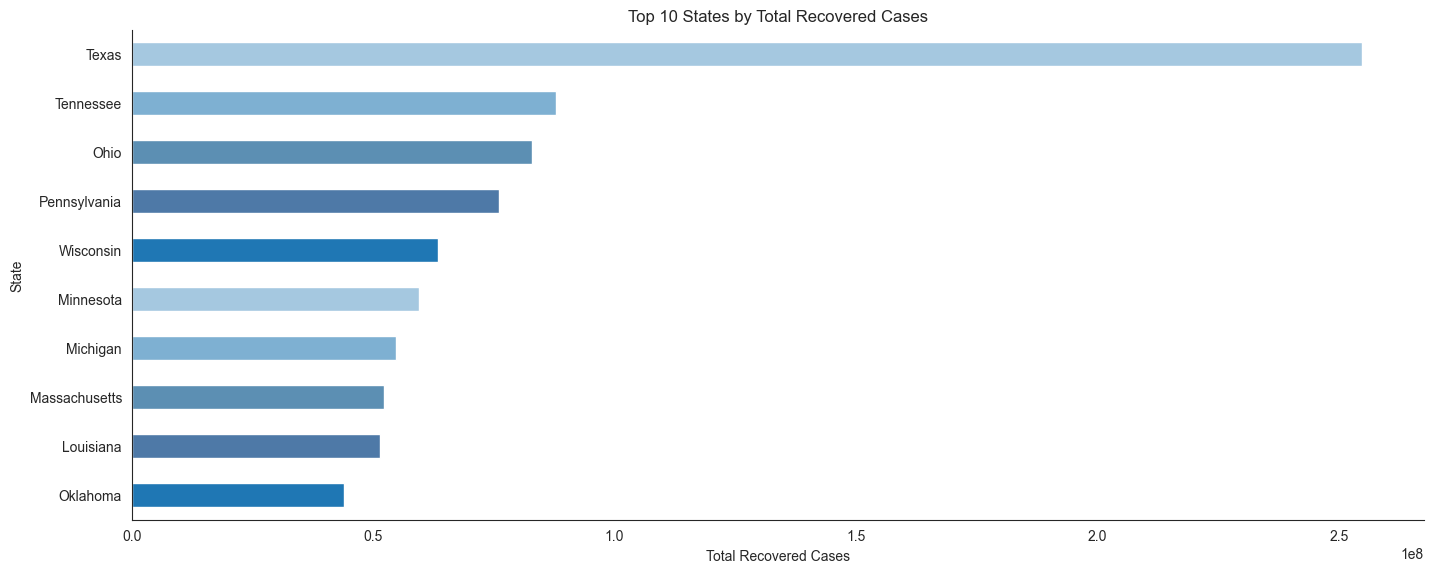

C:\Users\yaelp\AppData\Local\Temp\ipykernel_19096\4255918234.py:199: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.annotate(txt, (scatter_df['positive'][i], scatter_df['death'][i]), fontsize=8)


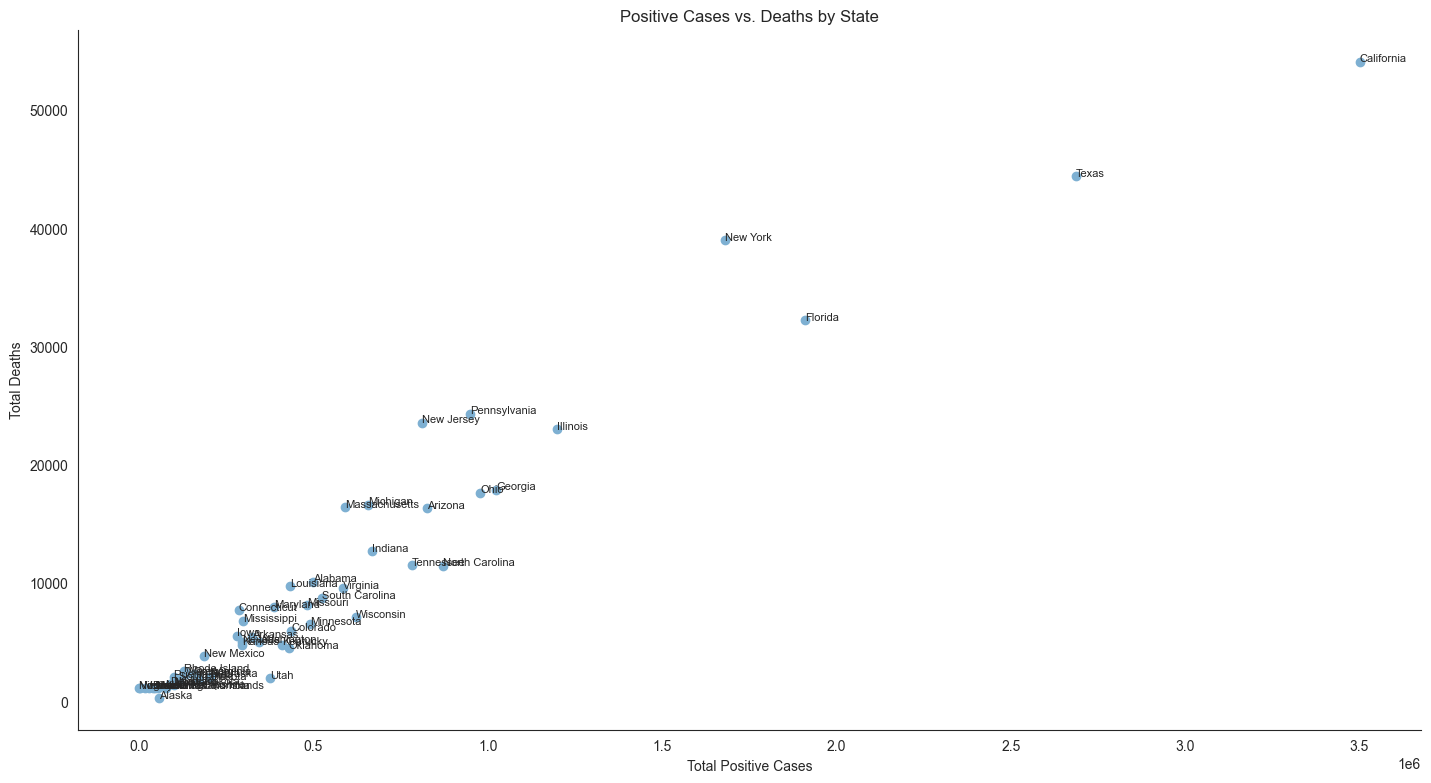

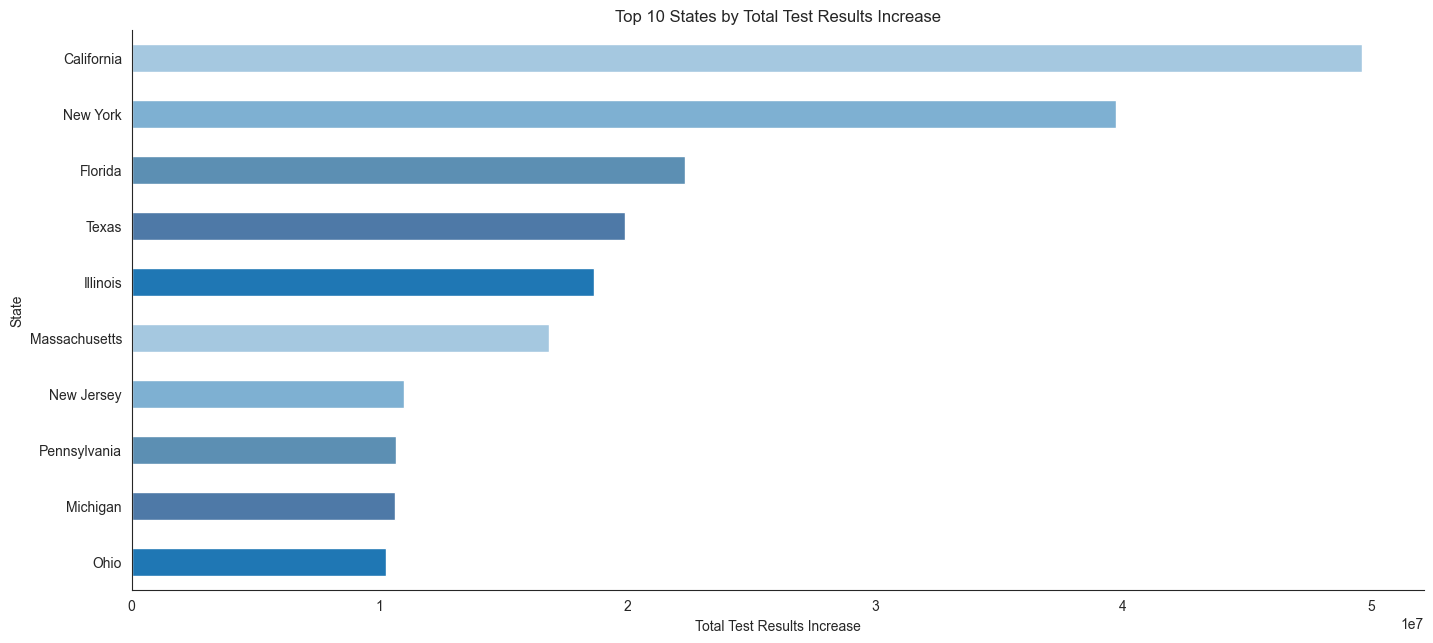

In [42]:
# Calculate death rate per population, handling nulls
df_unified['death_rate_per_population'] = (df_unified['death'] / df_unified['population']) * 100

def graphics(df, filename = 'covid_analysis_graphics.pdf'):
    with PdfPages(filename) as pdf:
       
        # Top 10 States by Total Deaths (handling nulls)
        plt.figure(figsize=(15, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        top_10_deaths = df.groupby('state_name')['death'].sum().nlargest(10).sort_values(ascending=True)
        top_10_deaths.plot(kind='barh')
        plt.title('Top 10 States by Total Deaths')
        plt.xlabel('Total Deaths')
        plt.ylabel('State')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        #  Top 10 States by Death Rate per Population (handling nulls)
        plt.figure(figsize=(15, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        top_10_death_rate = df.dropna(subset=['death_rate_per_population']).groupby('state_name')['death_rate_per_population'].max().nlargest(10).sort_values(ascending=True)
        top_10_death_rate.plot(kind='barh')
        plt.title('Top 10 States by Death Rate per Population (%)')
        plt.xlabel('Death Rate per Population (%)')
        plt.ylabel('State')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Daily Death Increase Over Time (Overall) (handling nulls)
        plt.figure(figsize=(15.8, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        daily_deaths = df.groupby('date')['death_increase'].sum()
        daily_deaths.plot()
        plt.title('Daily Death Increase Over Time (Overall)')
        plt.xlabel('Date')
        plt.ylabel('Daily Death Increase')
        pdf.savefig()
        plt.show()
        # ------------------------------------------------------------------------------------------------------------
        # Peak Dates for Death Increase (Top 5) (handling nulls)
        plt.figure(figsize=(15.8, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        top_5_peak_deaths = daily_deaths.nlargest(5)
        top_5_peak_deaths.plot(kind='bar')
        plt.title('Top 5 Peak Dates for Death Increase')
        plt.xticks(rotation=0)
        plt.xlabel('Date')
        plt.ylabel('Daily Death Increase')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Total Cases Over Time (handling nulls)
        plt.figure(figsize=(16, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        total_cases = df.groupby('date')['positive'].sum()
        total_cases.plot()
        plt.title('Total Positive Cases Over Time')
        plt.xlabel('Date')
        plt.ylabel('Total Positive Cases')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Distribution of Death Rate per Population (handling nulls)
        plt.figure(figsize=(17.3, 8))
        sns.histplot(df.dropna(subset=['death_rate_per_population'])['death_rate_per_population'], bins=30, kde=True)
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        plt.title('Frequency Distribution of COVID-19 Death Rates Across U.S. States')
        plt.ylabel('Number of States/Observations')
        plt.xlabel('Percentage of Deaths Relative to Population (%)')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Improved Correlation Heatmap (handling nulls)
        numerical_cols = ['positive', 'probable_cases', 'negative', 'total_test_results',
                  'hospitalized_currently', 'hospitalized_cumulative',
                  'in_icu_currently', 'in_icu_cumulative', 'recovered',
                  'death', 'death_confirmed', 'death_probable',
                  'positive_increase', 'total_test_results_increase',
                  'death_increase', 'hospitalized_increase', 'death_rate_per_population']

        numerical_corr = df[numerical_cols].dropna().corr()
        plt.figure(figsize=(18.2, 10)) 
        plt.subplots_adjust(left=0.2, right=0.95, top=0.9, bottom=0.1)
        colors = [(0, '#08153f'), 
          (0.3, '#1b6499'), 
          (0.6, '#087cc1'),  
          (1, '#cae4f7')] 
        colors_map = mcolors.LinearSegmentedColormap.from_list("pretty_blue", colors)
        sns.heatmap(numerical_corr, annot=True, fmt=".2f", cmap=colors_map,
                    vmin=-1, vmax=1, linewidths=.5, cbar_kws={"shrink": .8})
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        plt.title('Correlation Heatmap of Numerical Variables (Pearson Correlation)', fontsize=16)
        plt.xticks(rotation=20, ha='right')  
        plt.yticks(rotation=0)  
        plt.gca().set_facecolor('none')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Total Hospitalizations Over Time
        plt.figure(figsize=(15.7, 4))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        total_hospitalizations = df.groupby('date')['hospitalized_currently'].sum()
        total_hospitalizations.plot(color=BLUE_PALETTE[1])
        plt.title('Total Current Hospitalizations Over Time')
        plt.xticks(rotation=0)
        plt.xlabel('Date')
        plt.ylabel('Total Hospitalizations')
        plt.gca().set_facecolor('none')
        plt.xticks(rotation=0)
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Total ICU Patients Over Time (Handling Nulls by Dropping)
        plt.figure(figsize=(15.7, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca() 
        ax.spines['top'].set_visible(False) 
        ax.spines['right'].set_visible(False) 

        df_icu_clean = df.dropna(subset=['in_icu_currently'])

        if not df_icu_clean.empty: #check if the new dataframe is empty.
          total_icu = df_icu_clean.groupby('date')['in_icu_currently'].sum()
          total_icu.plot(color=BLUE_PALETTE[2])
          plt.title('Total Current ICU Patients Over Time') #change the title
          plt.xlabel('Date')
          plt.xticks(rotation=0)
          plt.ylabel('Total ICU Patients')
          plt.gca().set_facecolor('none')
          plt.xticks(rotation=0)
          pdf.savefig()
          plt.show()
        else:
          print("Warning: All rows with in_icu_currently data are null. No plot could be made.")


        # ------------------------------------------------------------------------------------------------------------
         # Top 10 States by Recovered Cases (Handling Nulls by Dropping)
        plt.figure(figsize=(15.2, 7))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 

        # Drop rows where 'recovered' is null before grouping
        df_recovered_clean = df.dropna(subset=['recovered'])

        if not df_recovered_clean.empty: #check if the new dataframe is empty
          top_10_recovered = df_recovered_clean.groupby('state_name')['recovered'].sum().nlargest(10).sort_values(ascending=True)
          top_10_recovered.plot(kind='barh', color=BLUE_PALETTE)
          plt.title('Top 10 States by Total Recovered Cases')
          ax = plt.gca()  
          ax.spines['top'].set_visible(False)  
          ax.spines['right'].set_visible(False) 
          plt.xlabel('Total Recovered Cases')
          plt.ylabel('State')
          plt.gca().set_facecolor('none')
          plt.yticks(rotation=0)
          pdf.savefig()
          plt.show()
        else:
          print("Warning: All rows with recovered data are null. No plot could be made.")
        # ------------------------------------------------------------------------------------------------------------
        # Scatter Plot: Positive Cases vs. Deaths
        plt.figure(figsize=(15.8, 10))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        scatter_df = df.groupby('state_name')[['positive', 'death']].max() #using max to get the final values.
        plt.scatter(scatter_df['positive'], scatter_df['death'], color=BLUE_PALETTE[3])
        for i, txt in enumerate(scatter_df.index):
            plt.annotate(txt, (scatter_df['positive'][i], scatter_df['death'][i]), fontsize=8)
        plt.title('Positive Cases vs. Deaths by State')
        plt.xlabel('Total Positive Cases')
        plt.ylabel('Total Deaths')
        plt.gca().set_facecolor('none')
        pdf.savefig()
        plt.show()

        # ------------------------------------------------------------------------------------------------------------
        # Top 10 States by Test Results Increase.
        plt.figure(figsize=(15.2, 8))
        plt.subplots_adjust(left=0.1, right=0.95, top=0.9, bottom=0.2) 
        ax = plt.gca()  
        ax.spines['top'].set_visible(False)  
        ax.spines['right'].set_visible(False)  
        top_10_test_increase = df.groupby('state_name')['total_test_results_increase'].sum().nlargest(10).sort_values(ascending=True)
        top_10_test_increase.plot(kind='barh', color=BLUE_PALETTE)
        plt.title('Top 10 States by Total Test Results Increase')
        plt.xlabel('Total Test Results Increase')
        plt.ylabel('State')
        plt.gca().set_facecolor('none')
        plt.yticks(rotation=0)
        pdf.savefig()
        plt.show()
        

# Generate the PDF Report
graphics(df_unified)

####  <span style="color:#f6f794"> Big numbers for presentation </span>

In [34]:
def big_numbers(df):

    # Get the latest cumulative data for each state
    latest_data = df.groupby('state_name').apply(lambda x: x.loc[x['date'].idxmax()])

    # Total Cases 
    total_cases = latest_data['positive'].sum()
    print(f"Total COVID-19 Cases : {total_cases:,.0f}")

    # Total Deaths 
    total_deaths = latest_data['death'].sum()
    print(f"Total COVID-19 Deaths : {total_deaths:,.0f}")

    # Total Tests 
    total_tests = latest_data['total_test_results'].sum()
    print(f"Total COVID-19 Tests : {total_tests:,.0f}")

    # Highest Daily Death Increase (handling nulls)
    if not df['death_increase'].isnull().all():
        max_daily_death_increase = df['death_increase'].max()
        max_daily_death_date = df.loc[df['death_increase'].idxmax(), 'date'].strftime('%Y-%m-%d')
        print(f"Highest Daily Death Increase: {max_daily_death_increase:,.0f} (on {max_daily_death_date})")
    else:
        print("Highest Daily Death Increase: Data unavailable (all nulls)")

    # Lowest Daily Death Increase (handling nulls)
    if not df['death_increase'].isnull().all():
        min_daily_death_increase = df['death_increase'].min()
        min_daily_death_date = df.loc[df['death_increase'].idxmin(), 'date'].strftime('%Y-%m-%d')
        print(f"Lowest Daily Death Increase: {min_daily_death_increase:,.0f} (on {min_daily_death_date})")
    else:
        print("Lowest Daily Death Increase: Data unavailable (all nulls)")

    # Highest Daily Case Increase (handling nulls)
    if not df['positive_increase'].isnull().all():
        max_daily_cases_increase = df['positive_increase'].max()
        max_daily_cases_date = df.loc[df['positive_increase'].idxmax(), 'date'].strftime('%Y-%m-%d')
        print(f"Highest Daily Case Increase: {max_daily_cases_increase:,.0f} (on {max_daily_cases_date})")
    else:
        print("Highest Daily Case Increase: Data unavailable (all nulls)")

    # Lowest Daily Case Increase (handling nulls)
    if not df['positive_increase'].isnull().all():
        min_daily_cases_increase = df['positive_increase'].min()
        min_daily_cases_date = df.loc[df['positive_increase'].idxmin(), 'date'].strftime('%Y-%m-%d')
        print(f"Lowest Daily Case Increase: {min_daily_cases_increase:,.0f} (on {min_daily_cases_date})")
    else:
        print("Lowest Daily Case Increase: Data unavailable (all nulls)")

    # Highest Daily Test Increase (handling nulls)
    if not df['total_test_results_increase'].isnull().all():
        max_daily_test_increase = df['total_test_results_increase'].max()
        max_daily_test_date = df.loc[df['total_test_results_increase'].idxmax(), 'date'].strftime('%Y-%m-%d')
        print(f"Highest Daily Test Increase: {max_daily_test_increase:,.0f} (on {max_daily_test_date})")
    else:
        print("Highest Daily Test Increase: Data unavailable (all nulls)")

    # Lowest Daily Test Increase (handling nulls)
    if not df['total_test_results_increase'].isnull().all():
        min_daily_test_increase = df['total_test_results_increase'].min()
        min_daily_test_date = df.loc[df['total_test_results_increase'].idxmin(), 'date'].strftime('%Y-%m-%d')
        print(f"Lowest Daily Test Increase: {min_daily_test_increase:,.0f} (on {min_daily_test_date})")
    else:
        print("Lowest Daily Test Increase: Data unavailable (all nulls)")

    # States with the most deaths 
    top_5_deaths = latest_data.nlargest(5, 'death')[['death']]
    print("\nStates with the most deaths :")
    for state, row in top_5_deaths.iterrows():
        print(f"  {state}: {row['death']:,.0f}")

    # States with the fewest deaths 
    bottom_5_deaths = latest_data.nsmallest(5, 'death')[['death']]
    print("\nStates with the fewest deaths :")
    for state, row in bottom_5_deaths.iterrows():
        print(f"  {state}: {row['death']:,.0f}")

    # States with the most cases 
    top_5_cases = latest_data.nlargest(5, 'positive')[['positive']]
    print("\nStates with the most cases :")
    for state, row in top_5_cases.iterrows():
        print(f"  {state}: {row['positive']:,.0f}")

    # States with the fewest cases 
    bottom_5_cases = latest_data.nsmallest(5, 'positive')[['positive']]
    print("\nStates with the fewest cases :")
    for state, row in bottom_5_cases.iterrows():
        print(f"  {state}: {row['positive']:,.0f}")

    # States with the highest death rate per population 
    top_5_death_rate = latest_data.nlargest(5, 'death_rate_per_population')[['death_rate_per_population']]
    print("\nStates with the highest death rate per population :")
    for state, row in top_5_death_rate.iterrows():
        print(f"  {state}: {row['death_rate_per_population']:.2f}%")

    # States with the lowest death rate per population 
    bottom_5_death_rate = latest_data.nsmallest(5, 'death_rate_per_population')[['death_rate_per_population']]
    print("\nStates with the lowest death rate per population :")
    for state, row in bottom_5_death_rate.iterrows():
        print(f"  {state}: {row['death_rate_per_population']:.2f}%")

    # Percentage of deaths relative to total cases 
    if total_cases > 0:
        death_rate_percentage = (total_deaths / total_cases) * 100
        print(f"\nPercentage of deaths relative to total cases: {death_rate_percentage:.2f}%")
    else:
        print("\nPercentage of deaths relative to total cases: Data unavailable (no cases)")

    # Percentage of cases relative to total tests 
    if total_tests > 0:
        cases_per_test_percentage = (total_cases / total_tests) * 100
        print(f"Percentage of cases relative to total tests: {cases_per_test_percentage:.2f}%")
    else:
        print("Percentage of cases relative to total tests: Data unavailable (no tests)")

# Example usage:
big_numbers(df_unified)

Total COVID-19 Cases : 28,748,740
Total COVID-19 Deaths : 515,018
Total COVID-19 Tests : 363,702,347
Highest Daily Death Increase: 2,559 (on 2021-02-12)
Lowest Daily Death Increase: -201 (on 2020-04-23)
Highest Daily Case Increase: 71,734 (on 2020-11-01)
Lowest Daily Case Increase: -7,757 (on 2020-09-02)
Highest Daily Test Increase: 473,076 (on 2021-01-10)
Lowest Daily Test Increase: -130,545 (on 2020-11-07)

States with the most deaths :
  California: 54,124
  Texas: 44,451
  New York: 39,029
  Florida: 32,266
  Pennsylvania: 24,349

States with the fewest deaths :
  Northern Mariana Islands: 2
  Virgin Islands: 25
  Vermont: 208
  Alaska: 305
  Hawaii: 445

States with the most cases :
  California: 3,501,394
  Texas: 2,686,818
  Florida: 1,909,209
  New York: 1,681,169
  Illinois: 1,198,335

States with the fewest cases :
  Northern Mariana Islands: 145
  Virgin Islands: 2,714
  Vermont: 16,083
  Hawaii: 28,699
  District of Columbia: 41,419

States with the highest death rate per p

C:\Users\yaelp\AppData\Local\Temp\ipykernel_19096\1246986950.py:4: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  latest_data = df.groupby('state_name').apply(lambda x: x.loc[x['date'].idxmax()])
